Importing Necessary Libraries:-

In [790]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Data Set :3

Reading the file

In [791]:
data3 = pd.read_csv('emissions_by_country.csv')

Displaying first few rows

In [792]:
print(data3.head())

       Country ISO 3166-1 alpha-3    Year  Total  Temperature  \
0  Afghanistan                AFG  1750.0    0.0           70   
1  Afghanistan                AFG  1751.0    0.0           66   
2  Afghanistan                AFG  1752.0    0.0           72   
3  Afghanistan                AFG  1753.0    0.0           44   
4  Afghanistan                AFG  1754.0    0.0           21   

   GDP Per Capita (USD)  Coal  Oil  Gas  Cement  Flaring  Other  Per Capita  
0                 55455   NaN  NaN  NaN     NaN      NaN    NaN         NaN  
1                 45101   NaN  NaN  NaN     NaN      NaN    NaN         NaN  
2                 31891   NaN  NaN  NaN     NaN      NaN    NaN         NaN  
3                 35466   NaN  NaN  NaN     NaN      NaN    NaN         NaN  
4                 33247   NaN  NaN  NaN     NaN      NaN    NaN         NaN  


Displaying the statistics

In [793]:
print(data3.describe())

               Year         Total   Temperature  GDP Per Capita (USD)  \
count  62307.000000  62381.000000  63104.000000          63104.000000   
mean    1888.267097     73.683456     49.497813          39026.539015   
std      122.651184    843.930381     17.292092          10975.539432   
min     1003.000000      0.000000     20.000000          20000.000000   
25%     1816.000000      0.000000     35.000000          29498.750000   
50%     1886.000000      0.000000     49.000000          39067.000000   
75%     1955.000000      0.659520     64.000000          48544.250000   
max     2999.000000  37123.850352     79.000000          57999.000000   

               Coal           Oil           Gas        Cement       Flaring  \
count  21797.000000  21774.000000  21717.000000  20488.000000  21338.000000   
mean     127.387271    153.480038    125.162671     62.599364     56.074327   
std      677.951392    670.830891    514.391435    353.918064    337.629062   
min        0.000000      0

Checking the missing values in the dataset

In [794]:
print(data3.isnull().sum())

Country                  2017
ISO 3166-1 alpha-3       3621
Year                      797
Total                     723
Temperature                 0
GDP Per Capita (USD)        0
Coal                    41307
Oil                     41330
Gas                     41387
Cement                  42616
Flaring                 41766
Other                   60419
Per Capita              43712
dtype: int64


Removing the numeric missing values using the mean 

In [795]:
numeric_cols=data3.select_dtypes(include=[np.number]).columns 
data3[numeric_cols]=data3[numeric_cols].fillna(data3[numeric_cols].mean())

In [796]:
print(data3.isnull().sum())

Country                 2017
ISO 3166-1 alpha-3      3621
Year                       0
Total                      0
Temperature                0
GDP Per Capita (USD)       0
Coal                       0
Oil                        0
Gas                        0
Cement                     0
Flaring                    0
Other                      0
Per Capita                 0
dtype: int64


First Standardizing the country names and ISO column and then checking for the sttring column outliers.

In [797]:
print(data3['Country'].unique())
print(data3['ISO 3166-1 alpha-3'].unique())

['Afghanistan' 'afghanistan' nan 'AFGHANISTAN' 'Albania' 'Algeria'
 'ALGERIA' 'algeria' 'Andorra' 'andorra' 'ANDORRA' 'Angola' 'angola'
 'ANGOLA' 'Anguilla' 'anguilla' 'ANGUILLA' 'Antarctica' 'antarctica'
 'ANTARCTICA' 'Antigua and Barbuda' 'ANTIGUA AND BARBUDA'
 'antigua and barbuda' 'ARGENTINA' 'Argentina' 'argentina' 'Armenia'
 'ARMENIA' 'armenia' 'Aruba' 'aruba' 'ARUBA' 'Australia' 'AUSTRALIA'
 'australia' 'Austria' 'austria' 'AUSTRIA' 'Azerbaijan' 'azerbaijan'
 'AZERBAIJAN' 'Bahamas' 'bahamas' 'Bahrain' 'bahrain' 'Bangladesh'
 'BANGLADESH' 'Barbados' 'barbados' 'BARBADOS' 'Belarus' 'BELARUS'
 'belarus' 'Belgium' 'belgium' 'BELGIUM' 'Belize' 'belize' 'Benin' 'benin'
 'Bermuda' 'bermuda' 'BERMUDA' 'Bhutan' 'bhutan' 'BHUTAN'
 'Bonaire, Saint Eustatius and Saba' 'BONAIRE, SAINT EUSTATIUS AND SABA'
 'bonaire, saint eustatius and saba' 'Bosnia and Herzegovina'
 'bosnia and herzegovina' 'Botswana' 'BOTSWANA' 'Brazil' 'BRAZIL' 'brazil'
 'British Virgin Islands' 'BRITISH VIRGIN ISLANDS'
 '

In [798]:
data3['Country']=data3['Country'].str.title().str.strip()
print(data3['Country'].unique())

['Afghanistan' nan 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antarctica' 'Antigua And Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bonaire, Saint Eustatius And Saba' 'Bosnia And Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Christmas Island'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Côte D'Ivoire"
 'Croatia' 'Cuba' 'Curaçao' 'Cyprus' 'Czech Republic' 'North Korea'
 'Democratic Republic Of The Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Faeroe Islands'
 'Micronesia (Federated States Of)' 'Fiji' 'Finland' 'Panama Canal Zone'
 'France' 'French Equatorial Africa' 'French Guiana' '

In [799]:
data3['ISO 3166-1 alpha-3']=data3['ISO 3166-1 alpha-3'].str.upper().str.strip()
print(data3['ISO 3166-1 alpha-3'].unique())


['AFG' nan 'ALB' 'DZA' 'AND' 'AGO' 'AIA' 'ATA' 'ATG' 'ARG' 'ARM' 'ABW'
 'AUS' 'AUT' 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU'
 'BTN' 'BES' 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'KHM' 'CAN'
 'CPV' 'CAF' 'TCD' 'CHL' 'CHN' 'CXR' 'COL' 'COM' 'COG' 'COK' 'CRI' 'CIV'
 'HRV' 'CUB' 'CUW' 'CYP' 'CZE' 'PRK' 'COD' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU'
 'EGY' 'SLV' 'GNQ' 'ERI' 'EST' 'ETH' 'FRO' 'FSM' 'FJI' 'FIN' 'PCZ' 'FRA'
 'GUF' 'PYF' 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GRC' 'GRL' 'GRD' 'GLP' 'GTM'
 'GIN' 'GNB' 'GUY' 'HTI' 'HND' 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRQ' 'IRL'
 'IRN' 'ISR' 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KIR' 'KSV' 'KWT' 'KGZ'
 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LIE' 'LTU' 'LUX' 'MAC' 'MKD' 'MDG'
 'MWI' 'MYS' 'MDV' 'MLI' 'MLT' 'MHL' 'MTQ' 'MRT' 'MUS' 'MYT' 'MEX' 'MNG'
 'MNE' 'MSR' 'MAR' 'MOZ' 'MMR' 'NAM' 'NRU' 'NPL' 'NLD' 'NCL' 'NZL' 'NIC'
 'NER' 'NGA' 'NIU' 'NOR' 'PSE' 'OMN' 'PAK' 'PLW' 'PAN' 'PNG' 'PRY' 'PER'
 'PHL' 'BOL' 'POL' 'PRT' 'PRI' 'QAT' 'CMR' 'KOR' 'MDA

Checking for outliers

In [800]:
print(data3.isnull().sum())

Country                 2017
ISO 3166-1 alpha-3      3621
Year                       0
Total                      0
Temperature                0
GDP Per Capita (USD)       0
Coal                       0
Oil                        0
Gas                        0
Cement                     0
Flaring                    0
Other                      0
Per Capita                 0
dtype: int64


Imputing the string missing values by mode

In [801]:
country_mode=data3['Country'].mode()[0]
data3['Country'].fillna(country_mode, inplace=True)
iso_mode=data3['ISO 3166-1 alpha-3'].mode()[0]
data3['ISO 3166-1 alpha-3'].fillna(iso_mode, inplace=True)
print(data3[['Country', 'ISO 3166-1 alpha-3']].isnull().sum())


Country               0
ISO 3166-1 alpha-3    0
dtype: int64


Checking the outliers for the numeric columns

In [802]:
numeric_cols=data3.select_dtypes(include=[np.number]).columns

Q1=data3[numeric_cols].quantile(0.25)
Q3=data3[numeric_cols].quantile(0.75)
IQR=Q3-Q1

outliers=(data3[numeric_cols] <(Q1 - 1.5 * IQR)) |(data3[numeric_cols] >(Q3 + 1.5 * IQR))
print(outliers.sum())


Year                     1145
Total                   13520
Temperature                 0
GDP Per Capita (USD)        0
Coal                     1362
Oil                      1489
Gas                      1319
Cement                    682
Flaring                   641
Other                    2685
Per Capita               1158
dtype: int64


Imputing the outliers using median

In [803]:
for col in numeric_cols:
    Q1=data3[col].quantile(0.25)
    Q3=data3[col].quantile(0.75)
    IQR =Q3-Q1

    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    
    median=data3[col].median()
    data3[col]=np.where((data3[col] <lower_bound)|(data3[col] >upper_bound),median,data3[col])

print(data3.describe())


               Year         Total   Temperature  GDP Per Capita (USD)  \
count  63104.000000  63104.000000  63104.000000          63104.000000   
mean    1885.539726      0.076860     49.497813          39026.539015   
std       78.243050      0.284065     17.292092          10975.539432   
min     1612.000000      0.000000     20.000000          20000.000000   
25%     1819.000000      0.000000     35.000000          29498.750000   
50%     1888.000000      0.000000     49.000000          39067.000000   
75%     1952.000000      0.000000     64.000000          48544.250000   
max     2160.000000      2.088480     79.000000          57999.000000   

               Coal           Oil           Gas        Cement       Flaring  \
count  63104.000000  63104.000000  63104.000000  63104.000000  63104.000000   
mean      90.061382    108.980433     86.905429     43.444928     37.988535   
std       57.592458     69.273635     57.141580     28.535833     26.053672   
min        0.000000      0

Checking for outliers again

In [804]:
numeric_cols=data3.select_dtypes(include=[np.number]).columns

Q1=data3[numeric_cols].quantile(0.25)
Q3=data3[numeric_cols].quantile(0.75)
IQR=Q3-Q1

outliers=(data3[numeric_cols]<(Q1-1.5*IQR))|(data3[numeric_cols] >(Q3 +1.5*IQR))
print(outliers.sum())


Year                      18
Total                   9151
Temperature                0
GDP Per Capita (USD)       0
Coal                       0
Oil                        0
Gas                        0
Cement                     0
Flaring                    0
Other                      0
Per Capita                 0
dtype: int64


Capping the years range between 1750 and 2023

In [805]:
data3['Year']=data3['Year'].clip(lower=1750,upper=2023)
print(data3['Year'].describe())

count    63104.000000
mean      1885.534528
std         77.635885
min       1750.000000
25%       1819.000000
50%       1888.000000
75%       1952.000000
max       2023.000000
Name: Year, dtype: float64


Appling mean to impute the outliers

In [806]:
Q1_total=data3['Total'].quantile(0.25)
Q3_total=data3['Total'].quantile(0.75)
IQR_total=Q3_total-Q1_total

lower_bound_total=Q1_total-1.5*IQR_total
upper_bound_total = Q3_total + 1.5 * IQR_total

mean_total=data3['Total'].mean()

data3['Total']=data3['Total'].apply(lambda x: mean_total if x < lower_bound_total or x > upper_bound_total else x)
print(data3['Total'].describe())


count    63104.000000
mean         0.011146
std          0.027064
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.076860
Name: Total, dtype: float64


In [807]:
numeric_cols = data3.select_dtypes(include=[np.number]).columns
Q1=data3[numeric_cols].quantile(0.25)
Q3=data3[numeric_cols].quantile(0.75)
IQR=Q3-Q1

outliers=(data3[numeric_cols] <(Q1-1.5*IQR))|(data3[numeric_cols] >(Q3+1.5*IQR))
print(outliers.sum())


Year                       0
Total                   9151
Temperature                0
GDP Per Capita (USD)       0
Coal                       0
Oil                        0
Gas                        0
Cement                     0
Flaring                    0
Other                      0
Per Capita                 0
dtype: int64


Applying the mean to trying to rempve outliers in the Total column

In [808]:
Q1_total=data3['Total'].quantile(0.25)
Q3_total=data3['Total'].quantile(0.75)
IQR_total = Q3_total-Q1_total

lower_bound_total=Q1_total-1.5*IQR_total
upper_bound_total=Q3_total+1.5*IQR_total

mean_total=data3['Total'].mean()

data3['Total']=data3['Total'].apply(lambda x: mean_total if x < lower_bound_total or x > upper_bound_total else x)

Checking for outliers again

In [809]:
numeric_cols = data3.select_dtypes(include=[np.number]).columns
Q1=data3[numeric_cols].quantile(0.25)
Q3=data3[numeric_cols].quantile(0.75)
IQR=Q3-Q1

outliers=(data3[numeric_cols] <(Q1-1.5*IQR))|(data3[numeric_cols] >(Q3+1.5*IQR))
print(outliers.sum())


Year                       0
Total                   9151
Temperature                0
GDP Per Capita (USD)       0
Coal                       0
Oil                        0
Gas                        0
Cement                     0
Flaring                    0
Other                      0
Per Capita                 0
dtype: int64


The outliers in the total column may be genuine because inspite of applying capping, mean, median techiques even one outlier isn't reducing.So leaving them as it is

Histogram fo numeric features

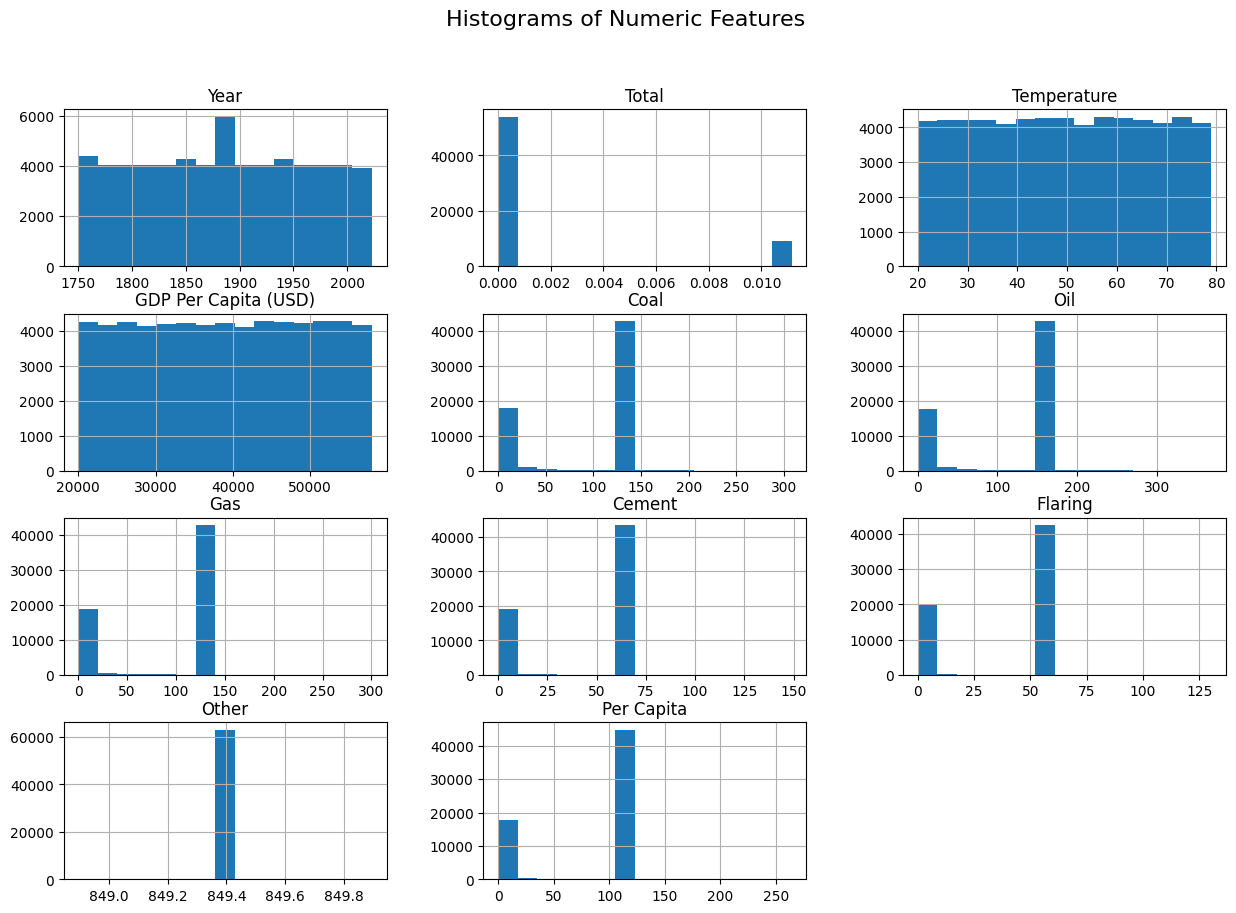

In [810]:
data3.select_dtypes(include=[np.number]).hist(bins=15,figsize=(15, 10))
plt.suptitle('Histograms of Numeric Features',fontsize=16)
plt.show()

Box plot for Oil, Gas and Cement Column

(array([1, 2, 3]),
 [Text(1, 0, 'Oil'), Text(2, 0, 'Gas'), Text(3, 0, 'Cement')])

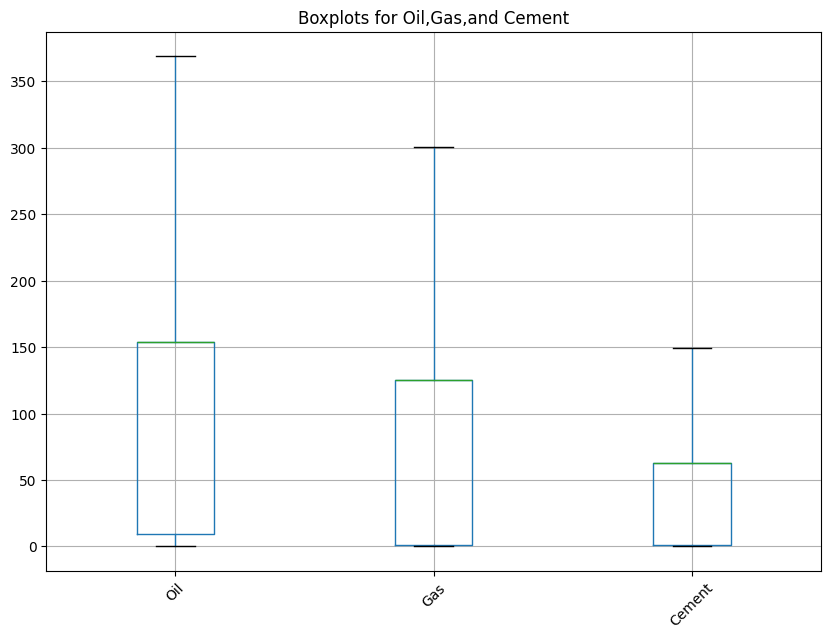

In [811]:
plt.figure(figsize=(10,7))
data3[['Oil','Gas','Cement']].boxplot()
plt.title('Boxplots for Oil,Gas,and Cement')
plt.xticks(rotation=45) 

Correlation Matrix Heatmap

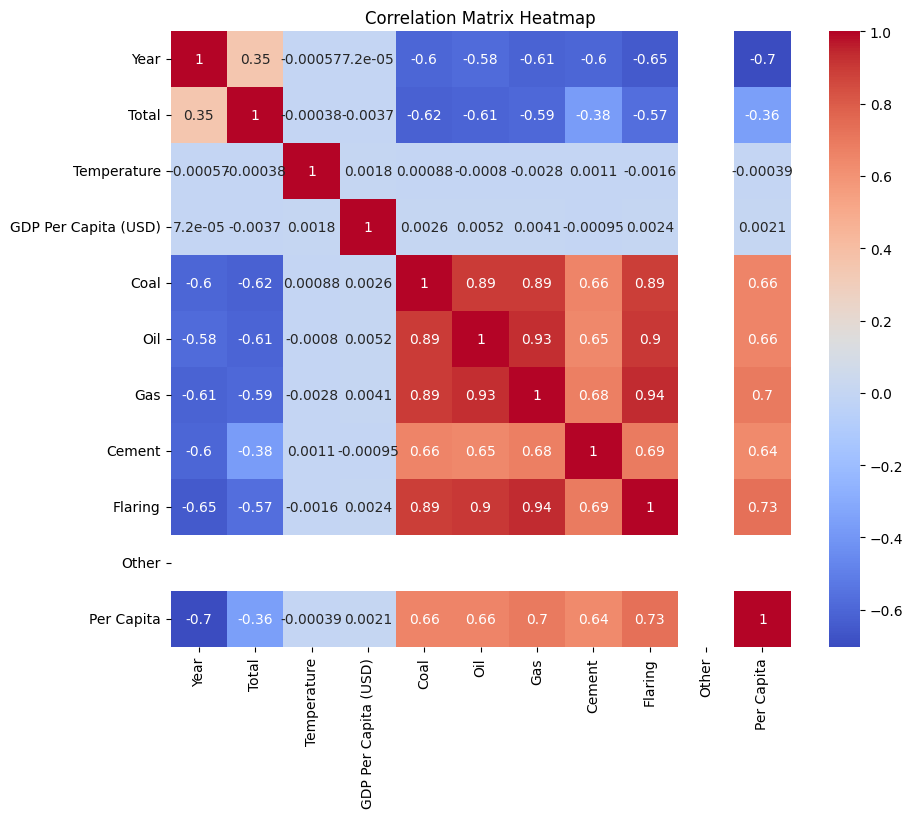

In [812]:
numeric_cols=data3.select_dtypes(include=[np.number])

plt.figure(figsize=(10,8))
corr_matrix=numeric_cols.corr()

sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Bar Plot for Top 10 countries vs Total Emissions

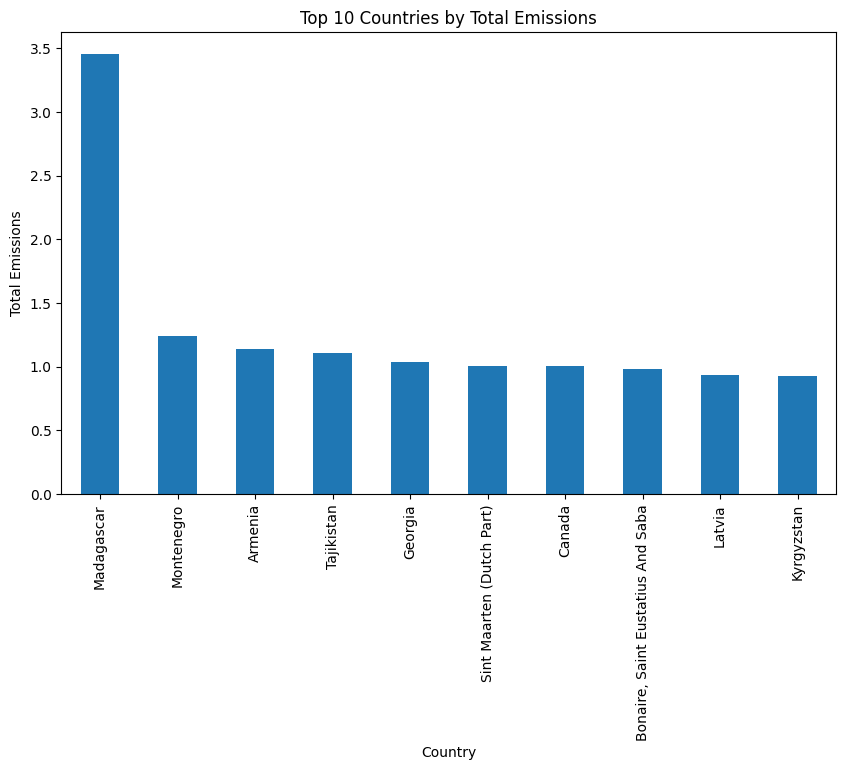

In [813]:
top_10_countries=data3.groupby('Country')['Total'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_10_countries.plot(kind='bar')
plt.title('Top 10 Countries by Total Emissions')
plt.ylabel('Total Emissions')
plt.xlabel('Country')
plt.show()

Scatter Plot for Coal vs Gas

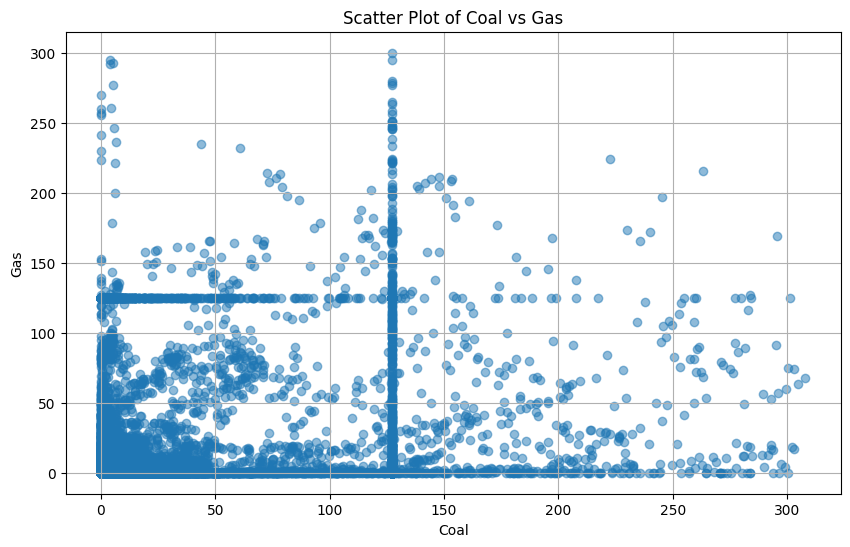

In [814]:
plt.figure(figsize=(10, 6))
plt.scatter(data3['Coal'],data3['Gas'],alpha=0.5)
plt.title('Scatter Plot of Coal vs Gas')
plt.xlabel('Coal')
plt.ylabel('Gas')
plt.grid(True)
plt.show()

lets take our feature variable as coal

In [815]:

numeric_data=data3.select_dtypes(include=[float, int])
correlation_matrix=numeric_data.corr()
correlation_with_temperature=correlation_matrix['Coal']
print(correlation_with_temperature)


Year                   -0.600984
Total                  -0.623267
Temperature             0.000881
GDP Per Capita (USD)    0.002634
Coal                    1.000000
Oil                     0.894037
Gas                     0.894869
Cement                  0.655831
Flaring                 0.889361
Other                        NaN
Per Capita              0.659820
Name: Coal, dtype: float64


Dropping the other column

In [816]:
data3=data3.drop('Other', axis=1)

In [817]:
threshold = 0.1
low_correlation_features=['Temperature','GDP Per Capita (USD)']
data_cleaned = data3.drop(low_correlation_features, axis=1)
print(data_cleaned.head())

       Country ISO 3166-1 alpha-3    Year  Total        Coal         Oil  \
0  Afghanistan                AFG  1750.0    0.0  127.387271  153.480038   
1  Afghanistan                AFG  1751.0    0.0  127.387271  153.480038   
2  Afghanistan                AFG  1752.0    0.0  127.387271  153.480038   
3  Afghanistan                AFG  1753.0    0.0  127.387271  153.480038   
4  Afghanistan                AFG  1754.0    0.0  127.387271  153.480038   

          Gas     Cement    Flaring  Per Capita  
0  125.162671  62.599364  56.074327  121.565443  
1  125.162671  62.599364  56.074327  121.565443  
2  125.162671  62.599364  56.074327  121.565443  
3  125.162671  62.599364  56.074327  121.565443  
4  125.162671  62.599364  56.074327  121.565443  


In [818]:
data_encoded = pd.get_dummies(data3, columns=['Country', 'ISO 3166-1 alpha-3'],drop_first=True)
numeric_columns = ['Year', 'Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring']
for col in numeric_columns:
    min_val = data_encoded[col].min()
    max_val = data_encoded[col].max()
    data_encoded[col] = (data_encoded[col] - min_val) / (max_val - min_val)
print(data_encoded.head())

       Year  Total  Temperature  GDP Per Capita (USD)      Coal       Oil  \
0  0.000000    0.0         70.0               55455.0  0.413554  0.416058   
1  0.003663    0.0         66.0               45101.0  0.413554  0.416058   
2  0.007326    0.0         72.0               31891.0  0.413554  0.416058   
3  0.010989    0.0         44.0               35466.0  0.413554  0.416058   
4  0.014652    0.0         21.0               33247.0  0.413554  0.416058   

        Gas    Cement   Flaring  Per Capita  ...  ISO 3166-1 alpha-3_VNM  \
0  0.416578  0.420126  0.429877  121.565443  ...                   False   
1  0.416578  0.420126  0.429877  121.565443  ...                   False   
2  0.416578  0.420126  0.429877  121.565443  ...                   False   
3  0.416578  0.420126  0.429877  121.565443  ...                   False   
4  0.416578  0.420126  0.429877  121.565443  ...                   False   

   ISO 3166-1 alpha-3_VUT  ISO 3166-1 alpha-3_WLD  ISO 3166-1 alpha-3_WLF  \
0  